!pip install datadotworld
!pip install datadotworld[pandas]

In [70]:
!dw configure

API token (obtained at: https://data.world/settings/advanced): Aborted!
^C


In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw 

In [72]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!cd "/content/drive/My Drive/Matrix Transformacja/dw_matrix/matrix_one"
!ls matrix_one

tanie-buty.ipynb


In [27]:
!mkdir data
!echo 'data' > .gitignore

mkdir: cannot create directory ‘data’: File exists


In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [36]:
df = data.dataframes['7004_1']
df.shape

(19387, 48)

In [37]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
16736,AVpfckvRilAPnD_xb6n_,NaN,Sourcingmap,"Clothing, Shoes, Accessories,Men's Sunglasses",Black,NaN,2016-02-14T11:26:00Z,2016-02-14T11:26:00Z,NaN,NaN,7.021052e+11,"[{""key"":""Manufacturer Part Number"",""value"":[""D...",NaN,NaN,NaN,"702105236611,0702105236611,sportsgrayrimsingle...",NaN,NaN,"[{""dateSeen"":[""2016-02-12T00:00:00Z""],""name"":""...",Sports Gray Rim Single Bridge Full Frame Glass...,7.12,7.12,NaN,NaN,New with tags,NaN,AUD,2016-02-14T11:26:00Z,2016-02-12T00:00:00Z,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,http://www.ebay.com.au/itm/Sports-Gray-Rim-Sin...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com.au/itm/Sp...",http://www.ebay.com.au/itm/Sports-Gray-Rim-Sin...,702105236611,NaN,NaN,NaN
5348,AVpfJiuJ1cnluZ0-e9m0,NaN,Converse,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Converse Black,NaN,2017-01-27T01:24:02Z,2017-01-27T01:24:02Z,"[{""dateSeen"":[""2017-01-27T01:24:02Z""],""sourceU...",NaN,8.869544e+11,"[{""key"":""Manufacturer Part Number"",""value"":[""1...",NaN,https://i5.walmartimages.com/asr/d0b15420-90dd...,NaN,"886954363008,0886954363008,converse/142132c",NaN,142132C,"[{""dateSeen"":[""2017-01-27T01:24:02Z""],""name"":""...",Converse Star Player Hi Shoes Size,55.00,55.00,NaN,NaN,new,NaN,USD,2017-01-27T01:24:02Z,2017-01-24T00:00:00Z,NaN,false,Shoenerds - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Converse-Star-Playe...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Converse-Star-Playe...,886954363008,NaN,NaN,NaN
14267,AVpfbDS71cnluZ0-kfzI,NaN,adidas,"Clothing,Shoes,Men's Shoes,Men's Casual Shoes",NaN,NaN,2016-02-14T01:28:20Z,2016-10-05T22:23:55Z,"[{""dateSeen"":[""2016-10-05T22:23:55Z""],""sourceU...",NaN,8.891329e+11,"[{""key"":""Style"",""value"":[""Fashion Sneakers""]},...",NaN,https://i5.walmartimages.com/asr/6f477745-5fe8...,NaN,adidasmensyeezyboost350oxfordtanlightstoneoxfo...,NaN,AQ2661,"[{""dateSeen"":[""2016-02-14T01:28:20Z""],""name"":""...","""Adidas Mens Yeezy Boost 350 ""oxford Tan"" Ligh...",1099.99,1099.99,NaN,NaN,New with box,NaN,USD,2016-02-14T01:28:20Z,2016-06-16T00:00:00Z,NaN,false,SOLE-UNLIMITED - Walmart.com,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/Adidas-x-Kanye-West-Ye...,NaN,NaN,NaN,7.5,"[{""sourceURLs"":[""http://www.ebay.com/itm/Adida...",https://www.walmart.com/ip/Adidas-Mens-Yeezy-B...,889132901986,NaN,NaN,NaN
4644,AVpfWvohilAPnD_xaRrQ,NaN,Nike,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",BlackRed,NaN,2016-03-18T22:03:58Z,2016-03-18T22:03:58Z,NaN,NaN,8.884081e+11,"[{""key"":""Style"",""value"":[""Basketball Shoes""]},...",NaN,http://i.ebayimg.com/images/g/ScwAAOSwEeFVF8ea...,NaN,"888408146823,0888408146823,nikeairjordan1retro...",NaN,NaN,"[{""dateSeen"":[""2016-03-10T00:00:00Z""],""name"":""...",Nike Air Jordan 1 Retro Low Og Bred Black/red ...,198.98,198.98,NaN,NaN,New with box,NaN,USD,2016-03-18T22:03:58Z,2016-03-10T00:00:00Z,NaN,false,shaqalz715shaqalz715 - Ebay.com,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/NIKE-AIR-JORDAN-1-RETR...,NaN,NaN,NaN,11.5,"[{""sourceURLs"":[""http://www.ebay.com/itm/NIKE-...",http://www.ebay.com/itm/NIKE-AIR-JORDAN-1-RETR...,888408146823,NaN,NaN,NaN
8040,AVpfHMHLilAPnD_xVNBH,NaN,Laredo,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Brown,NaN,2016-05-11T18:17:59Z,2016-05-11T18:19:15Z,NaN,NaN,NaN,"[{""key"":""Style"",""value"":[""Western & Cowboy Boo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-9d4f/...,NaN,laredo68065menus75brownwesternboot/3zzva776545...,NaN,68065,"[{""dateSeen"":[""2

In [38]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [42]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
new                                                   0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
New with box                                          0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[ df.prices_currency == 'USD' ].copy()

In [47]:
df_usd.shape

(18524, 48)

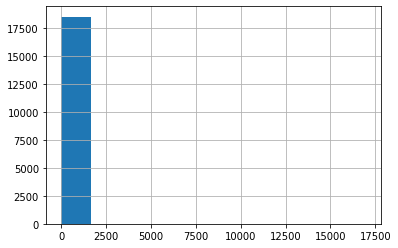

In [50]:
df_usd['prices_amountmin'] =  df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [53]:
filter_max = np.percentile( df_usd['prices_amountmin'], 99 )
filter_max

895.0

In [0]:
df_usd_filter = df_usd[ df_usd.prices_amountmin < filter_max ].copy()

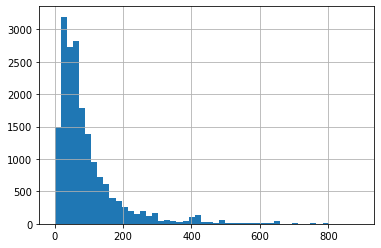

In [61]:
df_usd_filter['prices_amountmin'].hist(bins=50)

In [0]:
df_usd_filter.to_csv('data/shoes_prices.csv', index=False)

In [0]:
!git add matrix_one/tanie-buty.ipynb

In [79]:
!git commit -m "Dzień dobry, czy dostanę tanie buty? / dataset.world dataset load"

[master 5eb8302] Dzień dobry, czy dostanę tanie buty? / dataset.world dataset load
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite matrix_one/tanie-buty.ipynb (95%)


In [77]:
!git pull

From https://github.com/Companieero/dw_matrix
 + 74c0ecb...0abdf56 master     -> origin/master  (forced update)
Already up to date.


In [80]:
!git push

Counting objects: 9, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (9/9), 17.54 KiB | 1.95 MiB/s, done.
Total 9 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), done.
To https://github.com/Companieero/dw_matrix.git
   0abdf56..5eb8302  master -> master
